#### OLEJNICZAK Tom, 
#### ROUX Emile,
#### CHEN Dian

https://www.statista.com/statistics/591263/average-avocado-consumption-us-per-week/

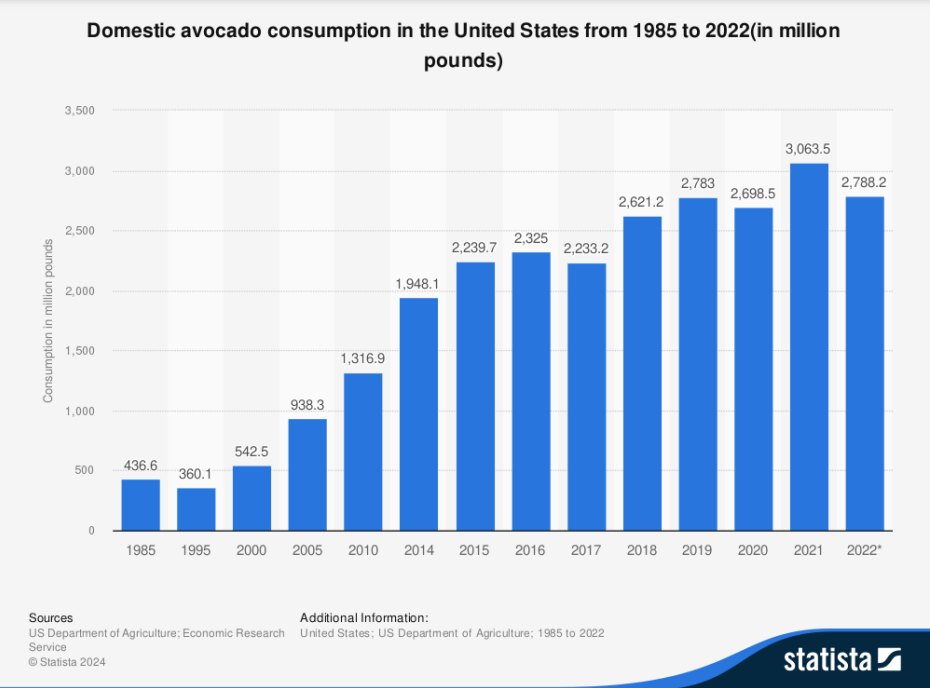

In [1]:
from IPython.display import Image
statista = r"C:/Users/tomol/OneDrive/Pictures/Screenshots/Screenshot 2024-03-28 153507.png"
display(Image(filename=statista))

In this project, we will be:
    
    - analyzing the consuption of data across the US for the given dataframe
    
    - forecast the price trends of avocado across the US

## Summary: 

#### I. Data Import & Manipulation
#### II. Forecasting using ARIMA
#### III. Forecasting using SARIMA (Seasonal Auto Regressive Integrated Moving Average)
#### IV. Conclusion

##

## I. Data Import & Manipulation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from itertools import combinations
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt

### Data Import

In [3]:
df = pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.shape

(18249, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We have a clean dataset; there is no need for column filling. 

### Data Exploration and manipulation

### Let's explore the trends in avocado price

#### 1. Price of Avocado across the us

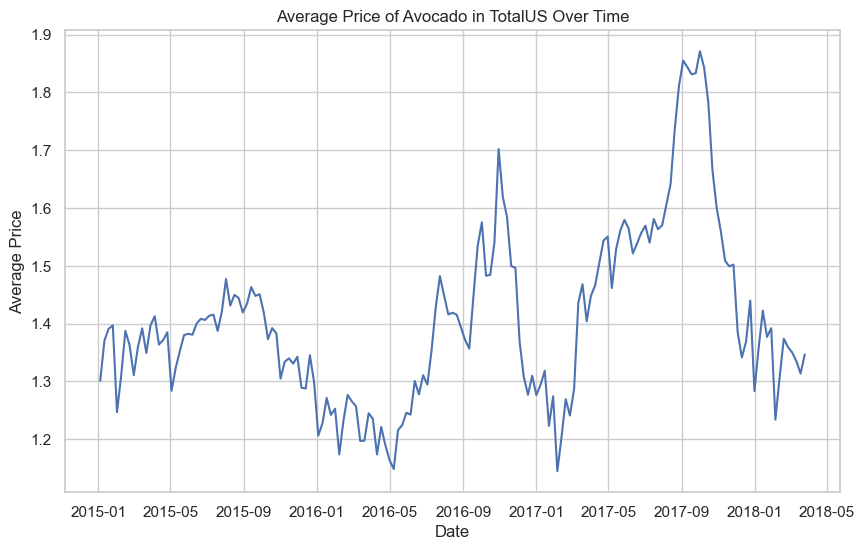

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(df.groupby('Date')['AveragePrice'].mean())
plt.title('Average Price of Avocado in TotalUS Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

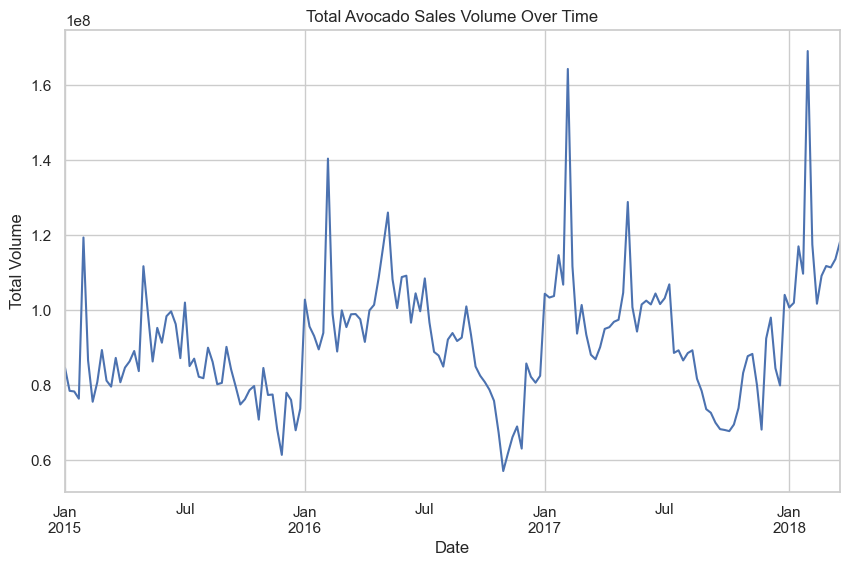

In [49]:
plt.figure(figsize=(10, 6))
df.groupby('Date')['Total Volume'].sum().plot()
plt.title('Total Avocado Sales Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Volume')
plt.show()

C:\Users\tomol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tomol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


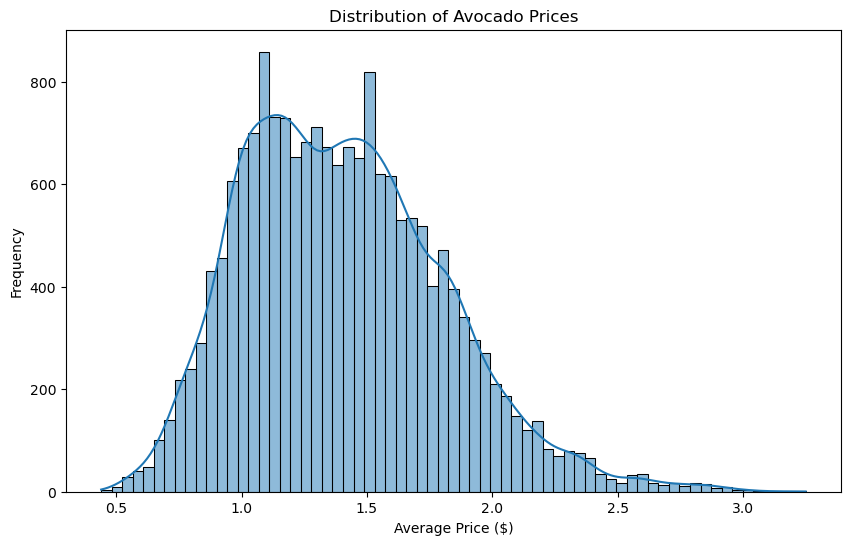

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AveragePrice'], kde=True)
plt.title('Distribution of Avocado Prices')
plt.xlabel('Average Price ($)')
plt.ylabel('Frequency')
plt.show()

#### 2. Region-specific trends

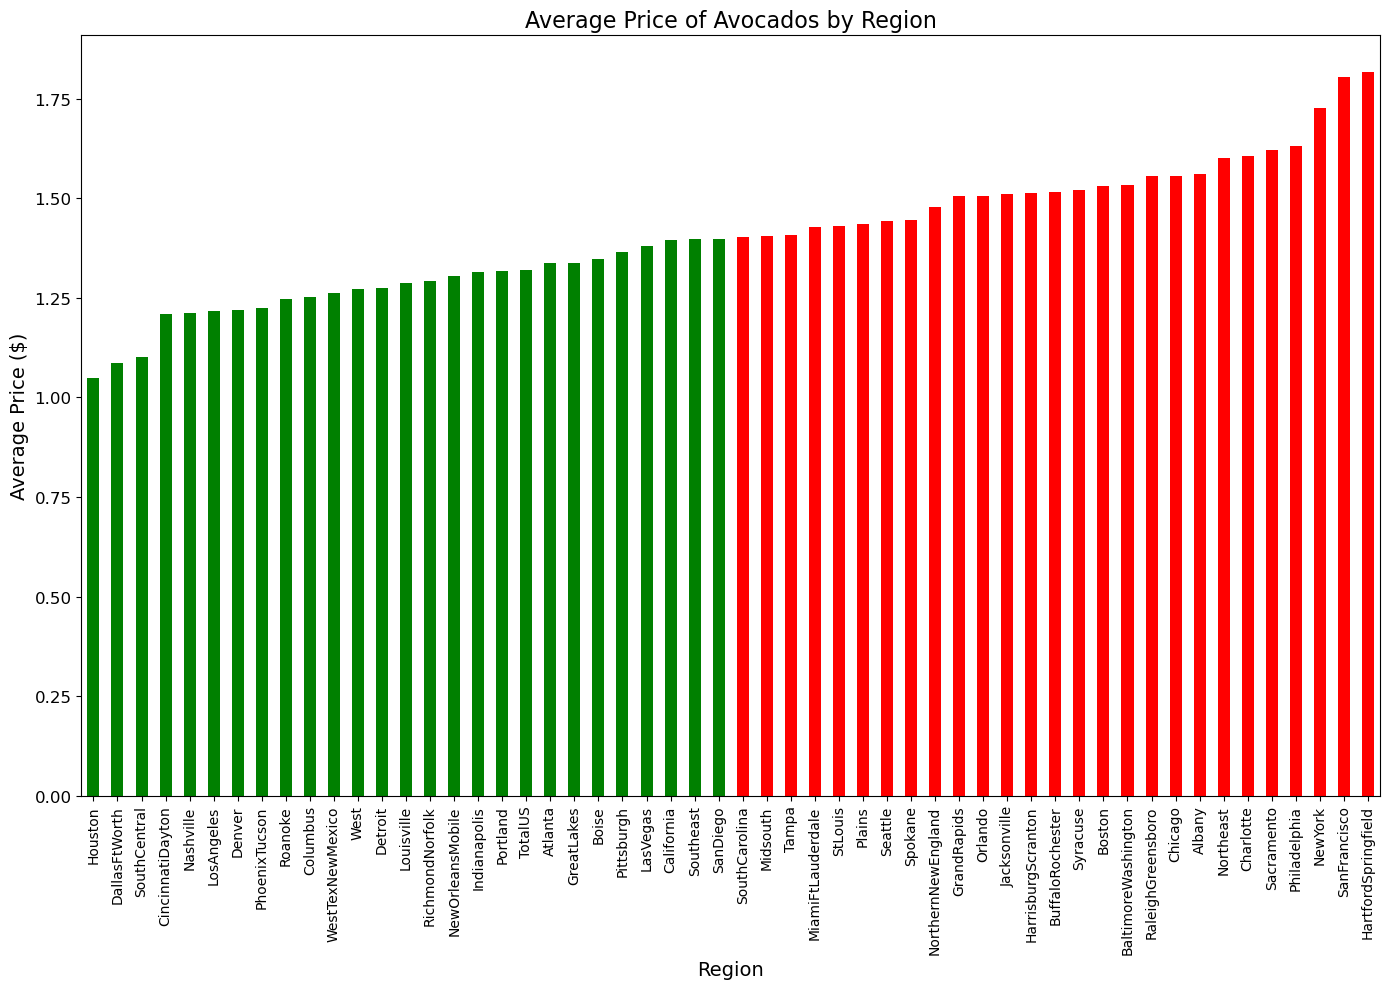

In [11]:
plt.figure(figsize=(14, 10))

avg_price_by_region_sorted = df.groupby('region')['AveragePrice'].mean().sort_values()
colors = ['green' if x < avg_price_by_region_sorted.median() else 'red' for x in avg_price_by_region_sorted]

avg_price_by_region_sorted.plot(kind='bar', color=colors)
plt.title('Average Price of Avocados by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
last_date = df['Date'].max()
last_year = last_date.year
df_last_year = df[df['Date'].dt.year == last_year]
avg_price_per_region_last_year = df_last_year.groupby('region')['AveragePrice'].mean().sort_values(ascending=False)
print("Top 5 regions with the highest average avocado price last year:")
print(avg_price_per_region_last_year.head(5))
print("\nTop 5 regions with the lowest average avocado price last year:")
print(avg_price_per_region_last_year.tail(5))

Top 5 regions with the highest average avocado price last year:
region
HartfordSpringfield    1.677500
Boston                 1.576667
NewYork                1.574583
Chicago                1.561667
SanFrancisco           1.549583
Name: AveragePrice, dtype: float64

Top 5 regions with the lowest average avocado price last year:
region
Indianapolis     1.168333
PhoenixTucson    1.155000
SouthCentral     1.104583
DallasFtWorth    1.102917
Houston          1.042083
Name: AveragePrice, dtype: float64


C:\Users\tomol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tomol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tomol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tomol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Figure size 1200x2000 with 0 Axes>

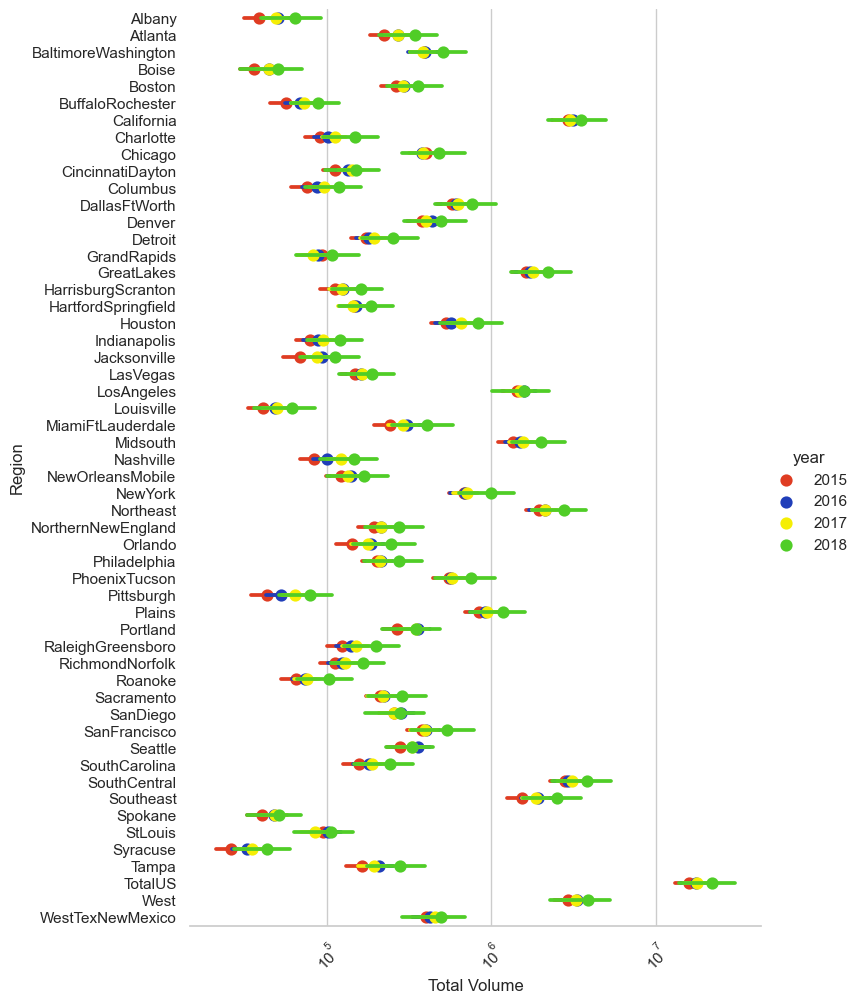

In [13]:
color2 = ['#DF3C22', '#203EB9', '#F5EE04', '#50CD27']
plt.figure(figsize=(12, 20))
sns.set_theme(style="whitegrid")
plot = sns.catplot(x='Total Volume', y='region', data=df, hue='year', height=10, aspect=0.8, 
                   palette=color2, kind='point', join=False)
plot.set(xscale="log")
plot.set_axis_labels("Total Volume", "Region")
plot.despine(left=True)
plt.xticks(rotation=45)
plt.show()

#### 3. Organic or Conventional? 

<Figure size 1000x600 with 0 Axes>

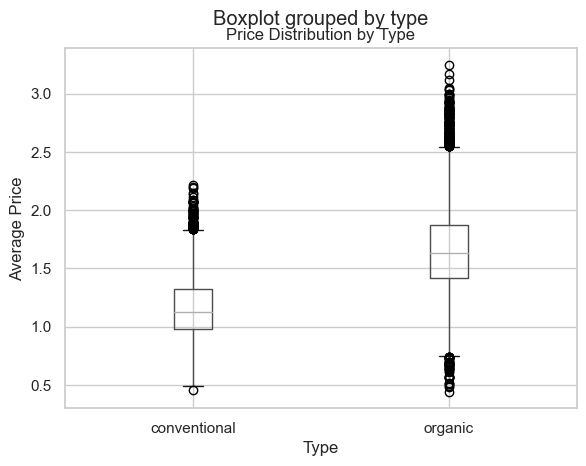

In [14]:
plt.figure(figsize=(10, 6))
df.boxplot('AveragePrice', by='type')
plt.title('Price Distribution by Type')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.show()

The boxplot indicates that organic avocados are generally more expensive than conventional ones, as evidenced by the higher median price. 

The organic category also exhibits greater variability in price, along with a larger number of high-price outliers, suggesting more frequent price spikes. 

Both distributions are right-skewed, meaning that while most of the data cluster at lower prices, there are instances of very high prices in the market, particularly for organic avocados. 

This graph suggest that consumers typically pay a premium for organic avocados, and market prices for these avocados can be quite volatile.

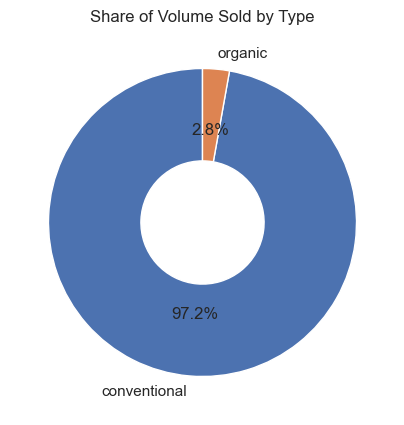

In [15]:
type_volume_totals = df.groupby('type')['Total Volume'].sum()

plt.figure(figsize=(5,5))
plt.pie(type_volume_totals, labels=type_volume_totals.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))
plt.gca().add_artist(plt.Circle((0, 0), 0.3, fc='white'))
plt.title('Share of Volume Sold by Type')
plt.show()


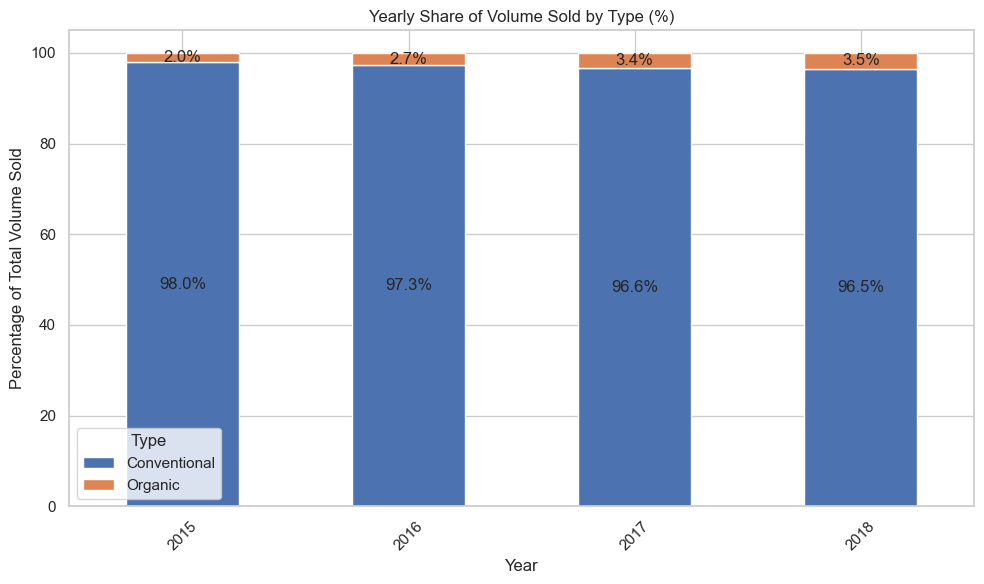

In [16]:
yearly_volume = df.groupby(['year', 'type'])['Total Volume'].sum().unstack()

yearly_percentage = yearly_volume.div(yearly_volume.sum(axis=1), axis=0) * 100

yearly_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Yearly Share of Volume Sold by Type (%)')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Volume Sold')
plt.xticks(rotation=45)
plt.legend(title='Type', labels=['Conventional', 'Organic'])
plt.tight_layout()

for n, x in enumerate([*yearly_percentage.index.values]):
    for (proportion, y_loc) in zip(yearly_percentage.loc[x], yearly_percentage.loc[x].cumsum()):
        plt.text(x=n, y=y_loc - (proportion / 2), s=f'{proportion:.1f}%', ha='center', va='center')

plt.show()

### 4. Time Series Analysis

In [19]:
df1 = df.copy(deep=True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)
numeric_cols = df1.select_dtypes(include=['number']).columns
df1 = df1[numeric_cols].resample('W').mean()
df1

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Date,,,,,,,,,,,
2015-01-04,50.990741,1.301296,7.840216e+05,306465.358704,341213.318796,21100.172593,115242.790648,91759.341667,23015.332407,468.116574,2015.0
2015-01-11,49.990741,1.370648,7.273686e+05,287260.786944,303781.757778,21751.550463,114574.490370,95860.522407,18313.259259,400.708704,2015.0
2015-01-18,48.990741,1.391111,7.258221e+05,294469.507963,293167.054907,20446.764352,117738.747593,97674.575093,19866.538241,197.634259,2015.0
2015-01-25,47.990741,1.397130,7.080211e+05,299121.600648,267862.244167,19244.248704,121793.027500,100715.897685,20859.406667,217.723148,2015.0
2015-02-01,46.990741,1.247037,1.106048e+06,465675.823704,469409.541481,34143.419537,136819.689815,107192.904167,28462.864722,1163.920926,2015.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,4.000000,1.359630,1.011402e+06,334272.681667,267146.528056,17937.882870,392024.723519,279950.488796,104767.552315,7306.682407,2018.0
2018-03-04,3.000000,1.350185,1.035601e+06,348894.357407,292967.505741,14315.347500,379405.846574,285591.463519,87350.231019,6464.152037,2018.0
2018-03-11,2.000000,1.335093,1.032085e+06,342727.715556,278956.907037,17654.501852,392740.366667,303336.144352,82858.199630,6546.022685,2018.0


In [20]:
m = list(df1.columns)
m.remove('AveragePrice')

df1.drop(columns = m,inplace =True)
df1.head()
# The purpose is to exclude the 'AveragePrice' column from the list of column names.

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037


In [21]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window = 12).mean()
    MSTD = timeseries.rolling(window = 12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [22]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

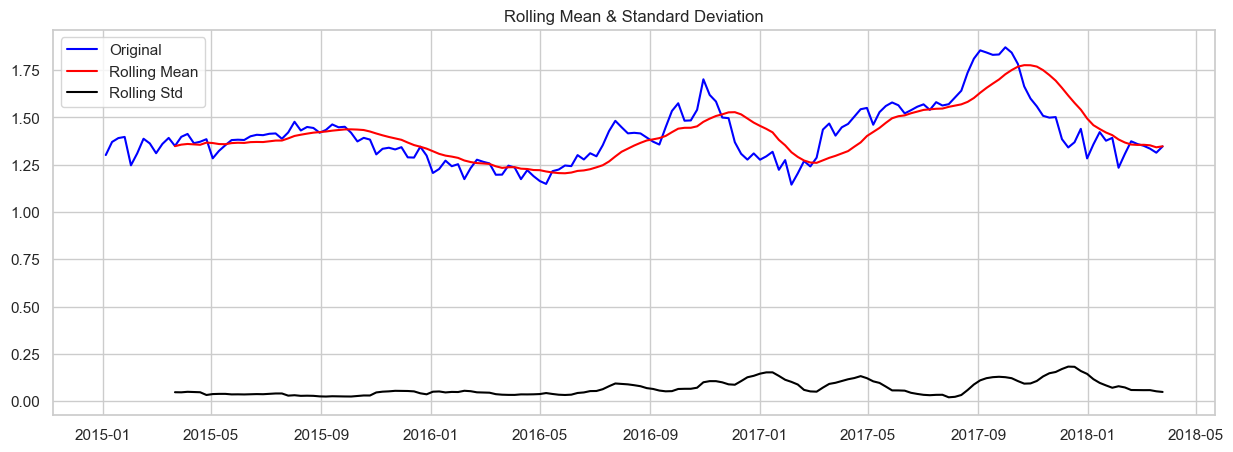

Results of Dickey-Fuller Test:
Test Statistic                  -2.357817
p-value                          0.153998
#Lags Used                       0.000000
Number of Observations Used    168.000000
Critical Value (1%)             -3.469886
Critical Value (5%)             -2.878903
Critical Value (10%)            -2.576027
dtype: float64


In [23]:
test_stationarity(df1['AveragePrice'])

In [24]:
0.15>0.05

True

#### Therefore, time series is not stationary.

In [25]:
df1['Log_AveragePrice'] = np.log(df1['AveragePrice'])
df1_log_diff = df1['Log_AveragePrice'].diff()
df1_log_diff = df1_log_diff.dropna()


This removes the log from the data to deal with stationarity. The trend and seasonality of the data have been also reduced.

We can now check the stationarity of the time series.

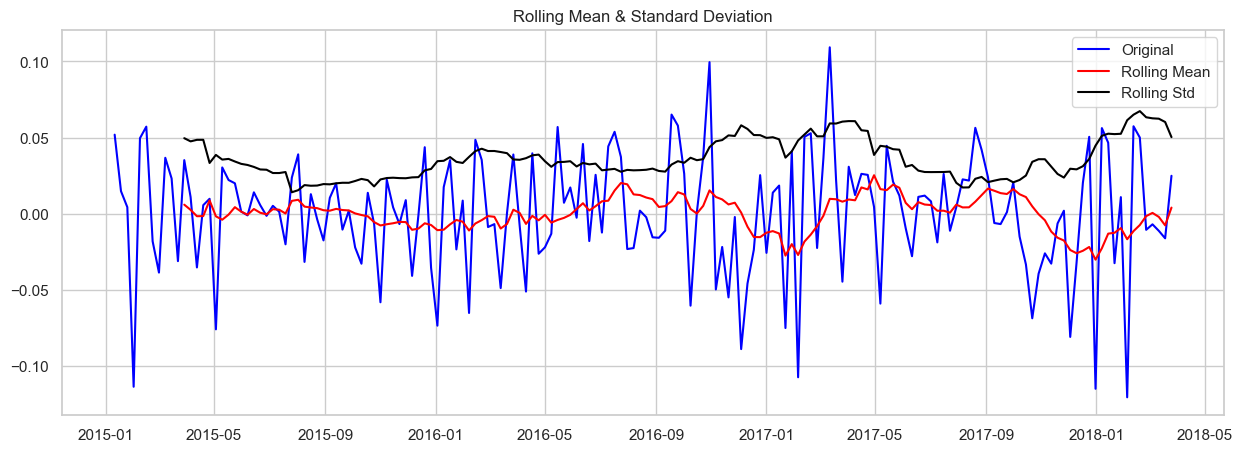

Results of Dickey-Fuller Test:
Test Statistic                -1.381916e+01
p-value                        7.964466e-26
#Lags Used                     0.000000e+00
Number of Observations Used    1.670000e+02
Critical Value (1%)           -3.470126e+00
Critical Value (5%)           -2.879008e+00
Critical Value (10%)          -2.576083e+00
dtype: float64


In [26]:
test_stationarity(df1_log_diff)

In [50]:
7.964466e-26<0.05

True

Now, the time series is stationary. 

## II. Forecasting using ARIMA

### Preparing the data: converting dates, calculating the weekly average price. 
The weekly frequency is explicitly set for time series analysis.

In [28]:
weekly_avg_price_us = df.groupby('Date')['AveragePrice'].mean()
weekly_avg_price_us.index = pd.date_range(start=weekly_avg_price_us.index.min(), 
                                          end=weekly_avg_price_us.index.max(), 
                                          freq='W-SUN')

### Splitting the data between training and test, using the end of 2017 as the cutoff. 
We then aggregate prices at a weekly frequency for each set, ensuring dates are correctly indexed for analysis.

In [29]:
train_end = pd.Timestamp('2017-12-31')
test_start = pd.Timestamp('2018-01-01')

train_data = df.loc[df['Date'] <= train_end]
test_data = df.loc[df['Date'] >= test_start]

weekly_avg_price_train = train_data.groupby('Date')['AveragePrice'].mean()
weekly_avg_price_test = test_data.groupby('Date')['AveragePrice'].mean()

weekly_avg_price_train.index = pd.date_range(start=weekly_avg_price_train.index.min(), 
                                             end=weekly_avg_price_train.index.max(), 
                                             freq='W-SUN')
weekly_avg_price_test.index = pd.date_range(start=weekly_avg_price_test.index.min(), 
                                            end=weekly_avg_price_test.index.max(), 
                                            freq='W-SUN')

print("Training set: From", weekly_avg_price_train.index.min(), "to", weekly_avg_price_train.index.max())
print("Test set: From", weekly_avg_price_test.index.min(), "to", weekly_avg_price_test.index.max())

Training set: From 2015-01-04 00:00:00 to 2017-12-31 00:00:00
Test set: From 2018-01-07 00:00:00 to 2018-03-25 00:00:00


### Checking stationarity of the weekly average prices using the ADF test.

In [30]:
def check_stationarity(timeseries):
    # Perform the Augmented Dickey-Fuller test on the time series
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
    # Interpretation based on the p-value
    if result[1] <= 0.05:
        print("The time series is stationary with 95% confidence.")
    else:
        print("The time series is not stationary. Differencing may be required.")

# Apply the stationarity test on the weekly average price (training set)
check_stationarity(weekly_avg_price_train)

ADF Statistic: -2.885415
p-value: 0.047070
Critical Values:
	1%: -3.475
	5%: -2.881
	10%: -2.577
The time series is stationary with 95% confidence.


### P-value < 0.05. 
This indicates that the time series of weekly average prices is stationary with 95% confidence.

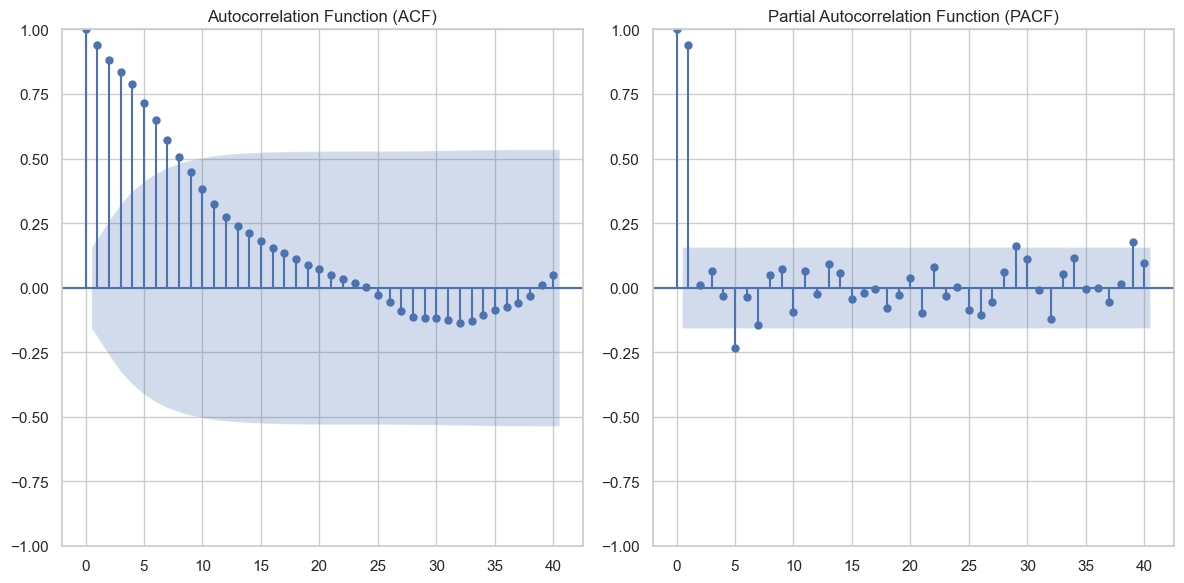

In [36]:
# Plotting the Autocorrelation Function (ACF)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(weekly_avg_price_train, ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function (ACF)')

# Plotting the Partial Autocorrelation Function (PACF)
plt.subplot(122)
plot_pacf(weekly_avg_price_train, ax=plt.gca(), lags=40)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
from statsmodels.tsa.arima.model import ARIMA
plt.show()

- P=1 The PACF plot displays a significant spike at lag 1 that surpasses the significance threshold, followed by a notable drop
- D=0 The ADF test resulted in a p-value of approximately 0.047.Which is below 0.05, we can infer that the time series is already stationary, which means that no differencing is necessary
- For q By examining the ACF plot, we observe a slow decline in the correlation as the lags increase. The significant spike at lag 1 suggests we should consider including a single moving average term, therefore q=1.


So we will base our model ARIMA with the parameters (1,0,1). 

In [35]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(weekly_avg_price_train, order=(1,0,1))
model_fit = model.fit()

# Retrieving the model's statistical summary
print(model_fit.summary())

# Forecasting with the fitted model
forecast = model_fit.forecast(steps=len(weekly_avg_price_test))

# Aligning the forecast index with the test data index for comparison
forecast.index = weekly_avg_price_test.index


                               SARIMAX Results                                
Dep. Variable:           AveragePrice   No. Observations:                  157
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 240.377
Date:                Mon, 01 Apr 2024   AIC                           -472.754
Time:                        21:43:08   BIC                           -460.529
Sample:                    01-04-2015   HQIC                          -467.789
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3915      0.070     20.009      0.000       1.255       1.528
ar.L1          0.9329      0.031     29.765      0.000       0.871       0.994
ma.L1          0.0665      0.087      0.767      0.4

- The SARIMAX results summary for our ARIMA model indicates a good model fit.
- An AIC of -472.754, indicating a good fit. 
- The significant AR coefficient at 0.9329 suggests strong temporal dependence. 
- The MA coefficient at 0.0665 is not significant, implying past errors don't contribute additional useful information. 


Overall, the model appears effective for forecasting.


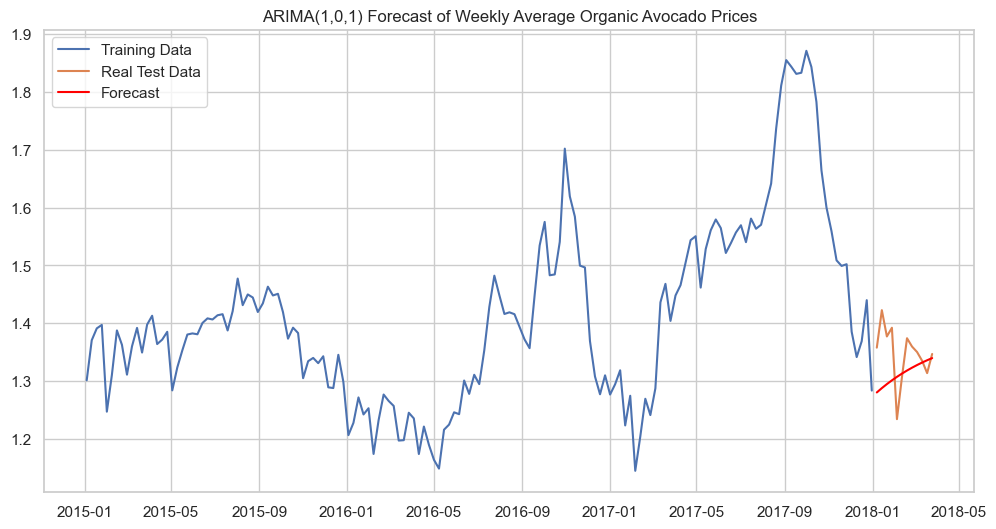

In [37]:
# Visualization
plt.figure(figsize=(12,6))
plt.plot(weekly_avg_price_train, label='Training Data')
plt.plot(weekly_avg_price_test, label='Real Test Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA(1,0,1) Forecast of Weekly Average Avocado Prices')
plt.legend()
plt.show()

Using the ARIMA(1,0,1) model, our model predicts that average prices will likely remain within the range seen in recent history, with a slight fluctuation. However, it's important to consider external events that could impact the market and are not reflected in the historical data.

In [38]:
rmse = sqrt(mean_squared_error(weekly_avg_price_test, forecast))
print("RMSE: ", rmse)

RMSE:  0.0646627749490267


RMSE indicates hight forecasting accuracy.

## III. Forecasting using SARIMA (Seasonal Auto Regressive Integrated Moving Average)

In [39]:
df1_log_di = df1_log_diff.diff(52)#52 weeks a year
df1_log_di= df1_log_di.dropna()

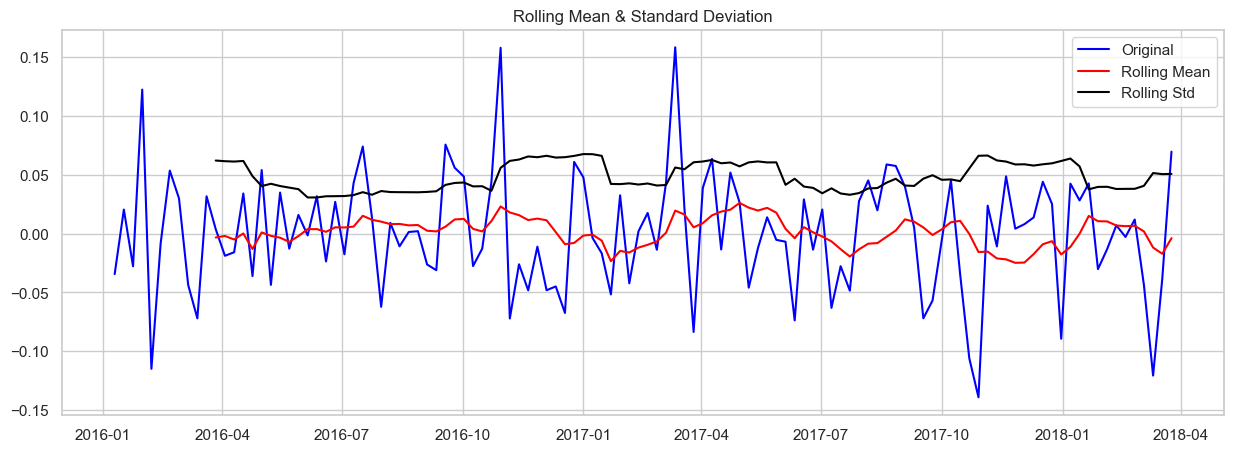

Results of Dickey-Fuller Test:
Test Statistic                  -4.574494
p-value                          0.000144
#Lags Used                      11.000000
Number of Observations Used    104.000000
Critical Value (1%)             -3.494850
Critical Value (5%)             -2.889758
Critical Value (10%)            -2.581822
dtype: float64


In [40]:
test_stationarity(df1_log_di)

- **0.05** > **p-value (0.00)**

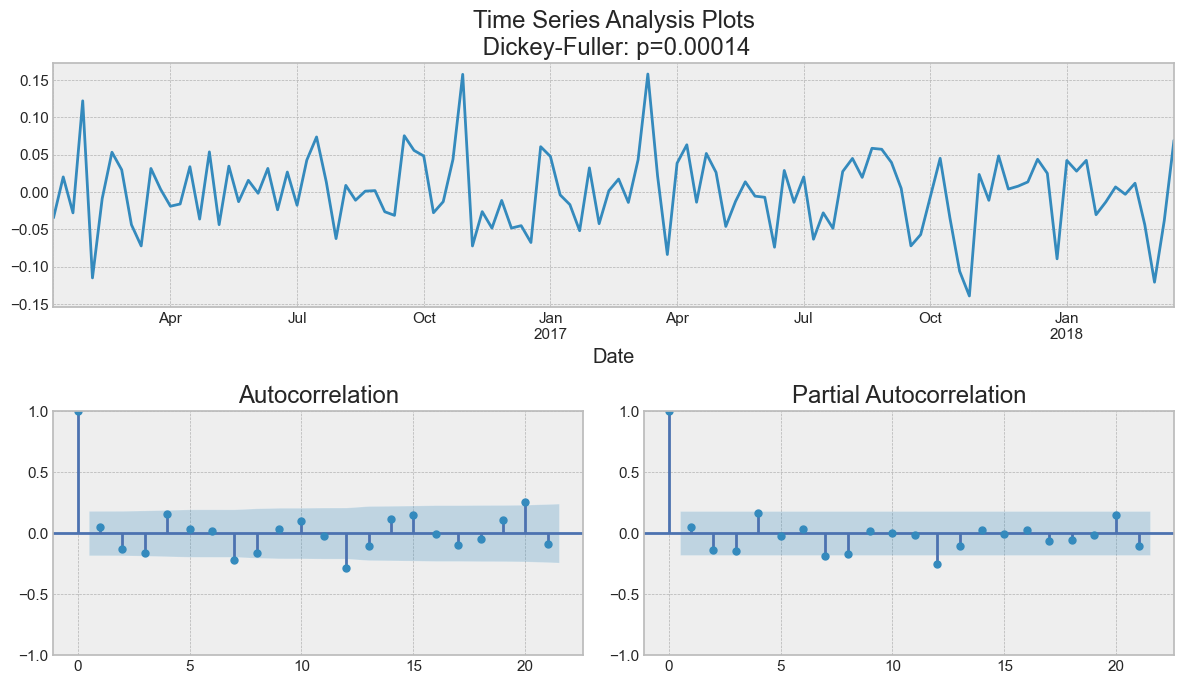

In [41]:
tsplot(df1_log_di)

For the SARIMA model, order of (p,d,q) will be same as the order of the ARIMA model above. 
   
   - P : 0
   
   - D : 1
   
   - Q : 0
   
   - M : 52

In [42]:
modell = sm.tsa.statespace.SARIMAX(df1['Log_AveragePrice'],order = (1,0,1),seasonal_order = (0,1,0,52))
model_fitt = modell.fit()
print(model_fitt.summary())

                                      SARIMAX Results                                      
Dep. Variable:                    Log_AveragePrice   No. Observations:                  169
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 52)   Log Likelihood                 186.283
Date:                             Mon, 01 Apr 2024   AIC                           -366.565
Time:                                     21:43:31   BIC                           -358.279
Sample:                                 01-04-2015   HQIC                          -363.201
                                      - 03-25-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9075      0.044     20.576      0.000       0.821       0.994
ma.L1          0.1073      

###  forecasting
- Forecasting values for the existing data points of the time series.

In [43]:
train_start = '2015-01-04'
train_end = '2017-12-31'
test_start = '2018-01-07'
test_end = '2018-03-25'


train = df1['Log_AveragePrice'].loc[train_start:train_end]
test = df1['Log_AveragePrice'].loc[test_start:test_end]


print('\t SARIMA MODEL : In - Sample Forecasting \n')

history = [x for x in train]
predictions = []

for t in range(len(test)):
    
    model = sm.tsa.statespace.SARIMAX(history,order = (1,0,1),seasonal_order = (0,1,0,52))
    model_fit = model.fit(disp = 0)
    
    output = model_fit.forecast()
    
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (np.exp(yhat), np.exp(obs)))

	 SARIMA MODEL : In - Sample Forecasting 



C:\Users\tomol\AppData\Local\Temp\ipykernel_22816\922259397.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


predicted = 1.291257, expected = 1.357778
predicted = 1.382214, expected = 1.422593
predicted = 1.314075, expected = 1.377130
predicted = 1.426475, expected = 1.392222
predicted = 1.238943, expected = 1.234074
predicted = 1.289625, expected = 1.307037
predicted = 1.369914, expected = 1.374074
predicted = 1.335236, expected = 1.359630
predicted = 1.401980, expected = 1.350185
predicted = 1.495730, expected = 1.335093


C:\Users\tomol\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 1.358975, expected = 1.313704
predicted = 1.264259, expected = 1.346852


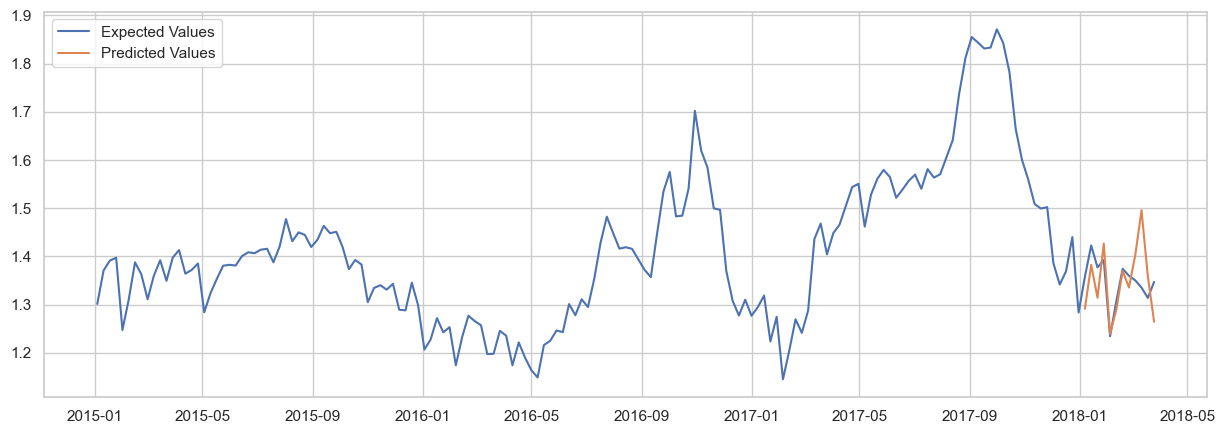

In [44]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(df1['AveragePrice'],label = 'Expected Values')
plt.plot(np.exp(predictions_series),label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [46]:
error = np.sqrt(mean_squared_error(np.exp(test),np.exp(predictions)))
print('Test RMSE: %.4f' % error)
predictions_series = pd.Series(np.exp(predictions), index = test.index)

Test RMSE: 0.0642


RMSE indicates hight forecasting accuracy.

## IV. Conclusion

With this project, we have first explored the data linked to the Avocado consumption in the US. 

    - Increasing quantity consumed over time 
    
    - The price of avocados also grew YoY across the US
    
    - Conventional avocados are more consumed than organic
    
    - Consumption vary between states


After also doing a time series analysis, we elected both ARIMA and SARIMA as models to predict the price of avocados.

Both models ended up displaying high accuracy.

- ARIMA RMSE:  0.0646627749490267

- SARIMA RMSE: 0.0642